# Import libraries

In [331]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt
from custommodels import KNNclassifier, GaussNB, Gauss
from usefulfunctions import MinMaxScaler, MinMaxScaler2, accuracy

# Prepare Data
## Import

In [332]:
data=pd.read_csv('MNIST_train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 787 entries, Unnamed: 0 to 783
dtypes: int64(787)
memory usage: 360.3 MB


## Explore

In [333]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [334]:
data.head()

,index,labels,0,1,2,3,4,5,6,7,...,774,775,776,777,778,779,780,781,782,783
0,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [335]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 786 entries, index to 783
dtypes: int64(786)
memory usage: 359.8 MB


In [336]:
# Change data frame to arrays
x=data.to_numpy()
x.shape

(60000, 786)

# EDA images

In [337]:
# reshape to make it possible for image
X=x[:,2:]
y=x[:,1]
X.shape

(60000, 784)

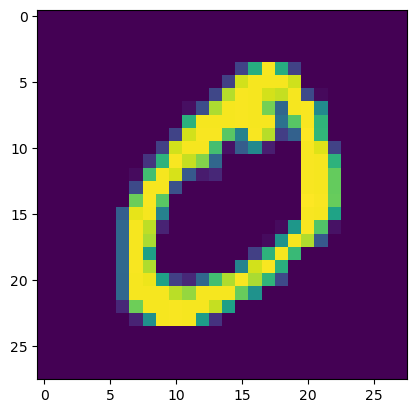

In [338]:
plt.imshow(X[1].reshape(28,28), interpolation='nearest')
plt.show;

In [339]:
# create a function for producing images
def show_me(X):
    return plt.imshow(X.reshape(28,28))
    
def show_me_allmean(X,y,k):
    show_me(sum(X[y==k,:]/len(X[y==k,:])))

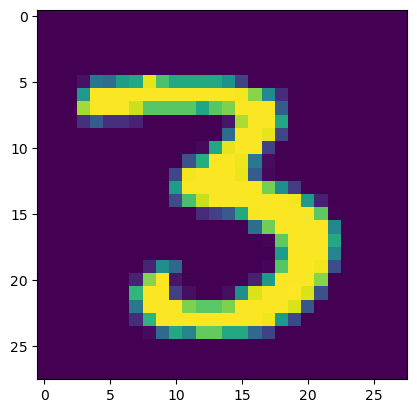

In [340]:
show_me(X[12]);

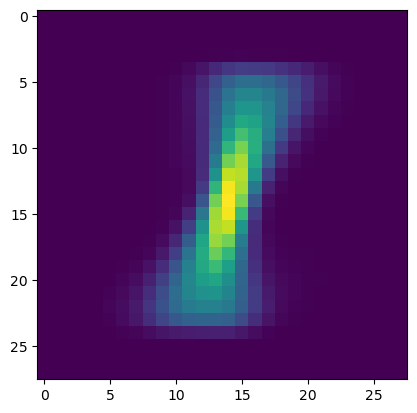

In [341]:
# plot the mean for a particular number. 1 in this case
show_me_allmean(X, y, 1)

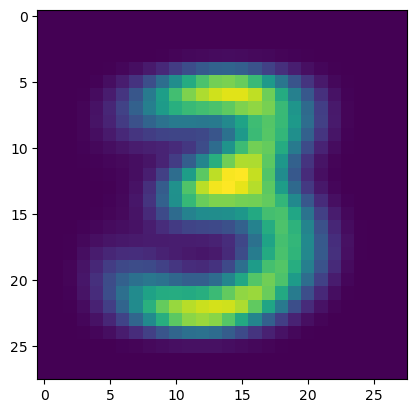

In [342]:
# plot the mean for a particular number. 3 in this case
show_me_allmean(X, y, 3)

## Split Data
- this data does not need splitting since we already have test data provided

In [343]:
# slice the features
X_train=x[:,2:]
y_train=x[:,1]  # labels
print(f'features are {X_train.shape}, and targets are {y_train.shape}')

features are (60000, 784), and targets are (60000,)


In [344]:
# Import test data
test_data=pd.read_csv('MNIST_test.csv')

In [345]:
test_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [346]:
# convert to array and split into features and target
X_T=test_data.to_numpy()
X_=X_T[:,2:]
y_ = X_T[:,1]

print(X_.shape)
y_.shape


(10000, 784)


(10000,)

In [347]:
# split function
def tt_split(X, y, test_size=0.2):

    i = int((1 - test_size) * X.shape[0]) 
    o = np.random.permutation(X.shape[0])
    
    X_train, X_test = np.split(np.take(X,o,axis=0), [i])
    y_train, y_test = np.split(np.take(y,o), [i])
    return X_train, X_test, y_train, y_test

In [348]:
X_val, X_test, y_val, y_test=tt_split(X_, y_, test_size=0.5)
print(X_val.shape, X_test.shape, y_val.shape, y_test.shape)

(5000, 784) (5000, 784) (5000,) (5000,)


# Build Model

## Baseline

In [349]:
acc_baseline=data['labels'].value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.11


# Iterate

In [350]:
# Scale the data

X_scaled=MinMaxScaler2(X_train)


In [351]:
# Build Models
model1 = GaussNB()
model2 = Gauss()


### GaussNB

In [303]:
# tune parameters
score={}
epsilon=[1e-5,1e-4,1e-3,1e-2,1e-1,1,10]
for epsilon in epsilon:
    model1.fit(X_scaled, y_train, epsilon=epsilon)
    y_hat=model1.predict(X_scaled)
    score[round(epsilon, 3)]=round(accuracy(y_hat, y_train),3)
score

{0.0: 0.719, 0.001: 0.768, 0.01: 0.802, 0.1: 0.765, 1: 0.66, 10: 0.597}

--best value for epsilon was 1e-2 which got 80% accuracy


In [313]:
# further tuning of the parameters
parameters_score={}
epsilon=[0.9e-2,1.9e-2,2.0e-2]
for epsilon in epsilon:
    model1.fit(X_scaled, y_train, epsilon=epsilon)
    y_hat=model1.predict(X_scaled)
    parameters_score[round(epsilon,4)]=round(accuracy(y_hat, y_train),3)
parameters_score

{0.009: 0.801, 0.019: 0.802, 0.02: 0.801}

In [314]:
# further tuning of the parameters
parameters_score={}
epsilon=[1.9e-2,1.95e-2,2e-2]
for epsilon in epsilon:
    model1.fit(X_scaled, y_train, epsilon=epsilon)
    y_hat=model1.predict(X_scaled)
    parameters_score[round(epsilon,4)]=round(accuracy(y_hat, y_train),3)
parameters_score

{0.019: 0.802, 0.0195: 0.801, 0.02: 0.801}

In [308]:
# optimum values is between 0.010 to 0.019

In [352]:
# train the best model
model1.fit(X_scaled, y_train, epsilon=1e-2)
y_hat=model1.predict(X_scaled)

In [353]:
accuracy(y_hat,y_train)

0.8015833333333333

### Gauss

In [176]:
parameters_score={}
epsilon=[1e-5,1e-4,1e-3,1e-2,1e-1,1,10]
for epsilon in epsilon:
    model2.fit(X_scaled, y_train, epsilon=epsilon)
    y_hat=model2.predict(X_scaled)
    parameters_score[round(epsilon,3)]=round(accuracy(y_hat, y_train),2)
parameters_score

{0.0: 0.9, 0.001: 0.93, 0.01: 0.96, 0.1: 0.95, 1: 0.88, 10: 0.68}

--best value for epsilon was 1e-2 which got 96% accuracy

In [311]:
# it appear that 1.6e-2 to 1.9e-2 are other good parameters getting a score of 96%

In [355]:
# train the best model
model2.fit(X_scaled, y_train, epsilon=1e-2)
y_hat=model2.predict(X_scaled)
accuracy(y_hat,y_train)


0.9555333333333333

# Evaluate

## Validation

In [354]:
X_val_scaled=MinMaxScaler2(X_val)
y_hat_val=model1.predict(X_val_scaled)
accu=accuracy(y_hat_val, y_val)
print('Validation Accuracy GaussNB', round(accu, 2))

Validation Accuracy GaussNB 0.82


In [358]:
y_hat_val=model2.predict(X_val)
accu=accuracy(y_hat_val, y_val)
print('Validation Accuracy for Gauss', round(accu, 2))

Validation Accuracy for Gauss 0.9


## with test data

## GaussNB

In [356]:
X_test_scaled=MinMaxScaler2(X_test)
y_hat_test=model1.predict(X_test_scaled)
accu=accuracy(y_hat_test, y_test)
print('Test Accuracy GaussNB', round(accu, 2))

Test Accuracy GaussNB 0.81


Text(0.5, 47.7222222222222, 'Predicted label')

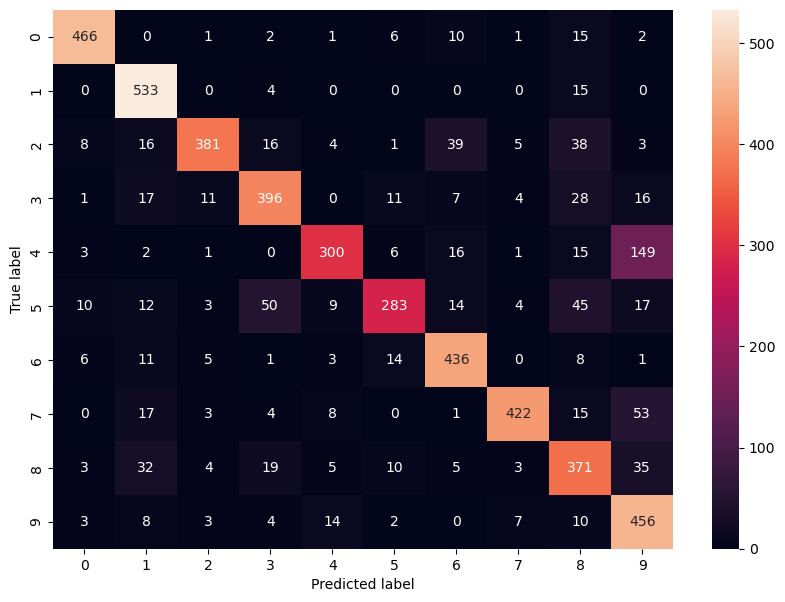

In [357]:
plt.figure(figsize=(10,7))
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_hat_test, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Gaus

In [359]:
X_test_scaled=MinMaxScaler2(X_test)
y_hat_test=model2.predict(X_test_scaled)
accu=accuracy(y_hat_test, y_test)
print('Test Accuracy Gauss', round(accu, 2))

Test Accuracy Gauss 0.94


Text(0.5, 47.7222222222222, 'Predicted label')

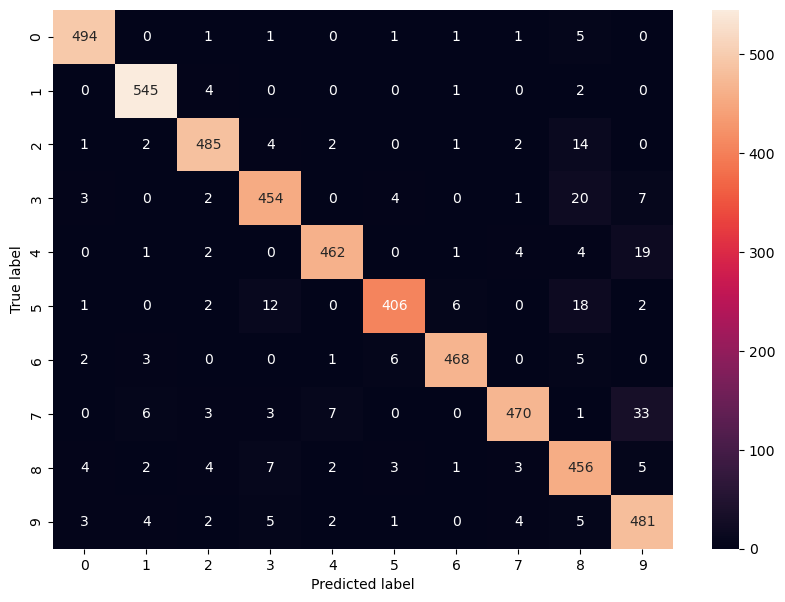

In [360]:
plt.figure(figsize=(10,7))
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_hat_test, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')